<a href="https://colab.research.google.com/github/anis000romzi/sales-data-clustering/blob/main/clustering_dwbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
from warnings import simplefilter
%matplotlib inline

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# ubah file csv menjadi dataframe
df = pd.read_csv('ta_dwbi_5.csv', sep=';')
df.head()

,id_penjualan,tanggal,provinsi,qty,vol_ml,nama_barang,total,nama_kurir,srv_lvl
0,4576,03-Jan-19,Banten,1,10,Basil,69000,JNE REG,Reg
1,4600,05-Jan-19,Banten,1,20,Lemongrass,99900,J&T CASHLESS,Exp
2,4600,05-Jan-19,Banten,1,20,Gurjun,28900,J&T CASHLESS,Exp
3,4600,05-Jan-19,Banten,1,10,Ylang Ylang,90500,J&T CASHLESS,Exp
4,4613,06-Jan-19,DKI Jakarta,2,1000,Cajuput,2107000,JNE REG,Reg


In [ ]:
# hapus kolom yang tidak dibutuhkan
df = df.drop(['id_penjualan', 'tanggal', 'provinsi', 'vol_ml', 'nama_barang', 'nama_kurir', 'srv_lvl'], axis=1)

# normalisasi data
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data = pd.DataFrame(scaled_data, columns= df.columns)
scaled_data.head()

,qty,total
0,-0.171956,-0.331396
1,-0.171956,-0.191761
2,-0.171956,-0.512605
3,-0.171956,-0.234239
4,2.556855,8.878167


Text(0, 0.5, 'Inertia')

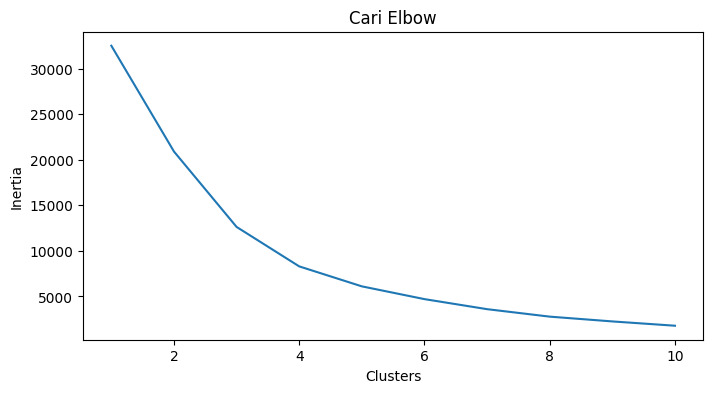

In [ ]:
# membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(scaled_data)
  clusters.append(km.inertia_)

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

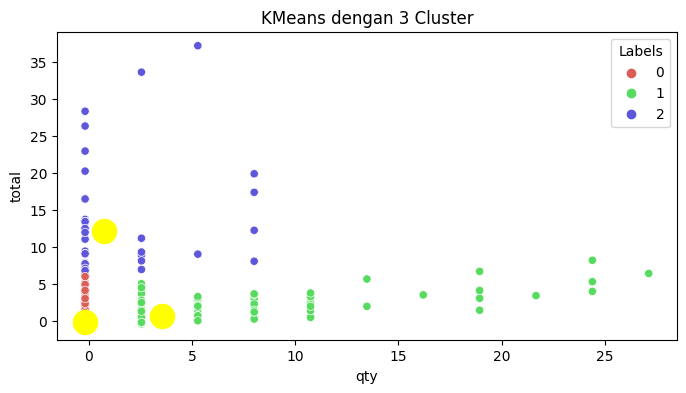

In [ ]:
# membuat objek KMeans
km3 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(scaled_data)

scaled_data['kmean'] = km3.labels_

# menambahkan kolom label pada dataset
scaled_data['Labels'] = km3.labels_

# membuat plot KMeans dengan 3 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(x=scaled_data['qty'],
                y=scaled_data['total'],
                hue=scaled_data['Labels'],
                palette=sns.color_palette('hls', 3))
plt.scatter(km3.cluster_centers_[:, 0],
            km3.cluster_centers_[:, 1],
            s=300,
            c='yellow',
            label='centroid')
plt.title('KMeans dengan 3 Cluster')
plt.show()

In [ ]:
# menghitung jumlah data pada cluster
cluster_labels = km3.fit_predict(scaled_data)
cluster_counts = Counter(cluster_labels)

# print jumlah data pada cluster
total_data = 0
for i in cluster_counts:
  total_data += cluster_counts[i]
  print(f'cluster {i}: {cluster_counts[i]}')

print(f'total data: {total_data}')

print('------------------------')

# print davies bouldin index
print('davies bouldin:', round(davies_bouldin_score(scaled_data, cluster_labels), 3))

cluster 0: 15467
cluster 2: 66
cluster 1: 733
total data: 16266
------------------------
davies bouldin: 0.524
